In [2]:
%matplotlib inline
import numpy as np # Numpy
import math
import matplotlib.pyplot as plt # 描画ライブラリ
import matplotlib.mlab as mlab
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects
# 日本語 font の設定例（IPA 日本語フォントの設定例）
from matplotlib import font_manager
font_path='ipaexg.ttf'
font_prop = font_manager.FontProperties(fname=font_path)
font_prop.set_style('normal')
font_prop.set_weight('light')
font_prop.set_size('12')
fp2 = font_prop.copy()
fp2.set_size('25')
# For plotting (上位 20 位までのランクと nDCG 値を保持する Numpy 配列)
data1 = np.zeros((2,20))
data2 = np.zeros((2,20))
RANK = 20


In [3]:
# sample
gain_google = np.array([3.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,3.0,2.0,3.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0])
gain_bing = np.array([0.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,2.0,1.0,2.0,0.0,3.0,2.0,3.0,0.0,1.0,3.0,0.0,1])

In [4]:
# red apples in a basket
gain_google = np.array([3.0,3.0,2.0,3.0,2.0,1.0,3.0,3.0,3.0,1.0,0.0,3.0,3.0,2.0,3.0,3.0,3.0,0.0,0.0,0])
gain_bing = np.array([3.0,3.0,2.0,0.0,3.0,2.0,1.0,1.0,2.0,3.0,3.0,3.0,1.0,3.0,1.0,2.0,3.0,2.0,0.0,3])

In [5]:
# white horse in the tokyo racetrack
gain_google = np.array([3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0])
gain_bing = np.array([3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0])

CG:Google  [ 3.  5.  7. 10. 12. 15. 18. 21. 24. 24. 26. 26. 26. 26. 26. 26. 26. 29.
 29. 29.]
CG:Bing  [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 5. 5. 5. 5. 5. 5. 5. 7. 7.]

DCG:Google  [ 3.          5.          6.26185951  7.76185951  8.62321262  9.78377104
 10.85239261 11.85239261 12.79878724 12.79878724 13.37691689 13.37691689
 13.37691689 13.37691689 13.37691689 13.37691689 13.37691689 14.09635429
 14.09635429 14.09635429]
DCG:Bing  [3.         3.         3.         3.         3.         3.
 3.         3.         3.         3.         3.         3.55788589
 3.55788589 3.55788589 3.55788589 3.55788589 3.55788589 3.55788589
 4.02870372 4.02870372]

nDCG:Google  [1.         0.83333333 0.79336459 0.82636364 0.80705276 0.82595689
 0.8403588  0.87274019 0.90058765 0.86398576 0.86909458 0.86909458
 0.86909458 0.86909458 0.86909458 0.86909458 0.86909458 0.91583623
 0.91583623 0.91583623]
nDCG:Bing  [1.         0.6        0.47909091 0.47909091 0.47909091 0.47909091
 0.47909091 0.47909091 0.47909091

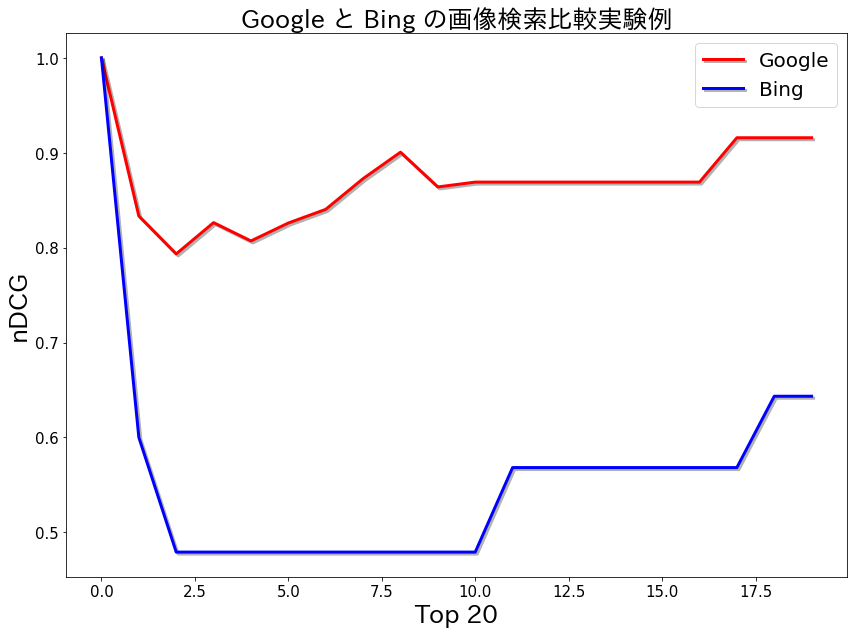

In [6]:
#@title デフォルトのタイトル テキスト
def calc_cg(score_array: np.ndarray)->np.ndarray:
    a = score_array.copy()
    for i in range(1,len(a)):
        a[i] = a[i-1]+a[i]
    return a

def calc_dcg(score_array: np.ndarray)->np.ndarray:
    dcg = score_array.copy()
    dcg[1] = dcg[1] + dcg[0]
    for i in range(1,len(dcg)):
        dcg[i] = dcg[i-1] + (score_array[i] / math.log2(i+1))
    return dcg

def calc_ndcg(dcg,ideal_dcg)->np.ndarray:
    ndcg = np.zeros(20)
    for i in range(len(ndcg)):
        ndcg[i] = dcg[i]/ideal_dcg[i]
    return ndcg

for i in range(RANK):
 data1[0,i] = data2[0,i] = i

cg_google = calc_cg(gain_google)
dcg_google = calc_dcg(gain_google)
ideal_gain_google = np.sort(gain_google)[::-1]
ideal_cg_google = calc_cg(ideal_gain_google)
ideal_dcg_google = calc_dcg(ideal_gain_google)
nDCG_Google = calc_ndcg(dcg_google,ideal_dcg_google)

cg_bing = calc_cg(gain_bing)
dcg_bing = calc_dcg(gain_bing)
ideal_gain_bing = np.sort(gain_bing)[::-1]
ideal_cg_bing = calc_cg(ideal_gain_bing)
ideal_dcg_bing = calc_dcg(ideal_gain_bing)
nDCG_Bing = calc_ndcg(dcg_bing,ideal_dcg_bing)

print('CG:Google ',cg_google)
print('CG:Bing ',cg_bing)
print('')
print('DCG:Google ',dcg_google)
print('DCG:Bing ',dcg_bing)
print('')
print('nDCG:Google ',nDCG_Google)
print('nDCG:Bing ',nDCG_Bing)
data1[1,:] = nDCG_Google
data2[1,:] = nDCG_Bing
plt.figure(figsize=(14,10))
plt.plot(data1[0,:], data1[1,:], color='red',label="Google",linewidth=3,
path_effects=[path_effects.SimpleLineShadow(),
path_effects.Normal()])
plt.plot(data2[0,:], data2[1,:], color='blue',label="Bing",linewidth=3,
path_effects=[path_effects.SimpleLineShadow(),
path_effects.Normal()])
plt.tick_params(labelsize=15)
plt.xlabel('Top 20',fontsize=20,font_properties=fp2)
plt.ylabel('nDCG',fontsize=20,font_properties=fp2)
plt.title('Google と Bing の画像検索比較実験例',fontsize=25,font_properties=fp2)
plt.legend(['Google', 'Bing'], loc='best', fontsize=20)
plt.savefig('Kadai3-nDCG.pdf') # スケーラブルな PDF に出力